# 2D turbulence in jet model

In [1]:
import numpy as np
import xarray as xr
import fsspec
import matplotlib
import matplotlib.pyplot as plt
import pyqg 
import pyqg.diagnostic_tools as tools
import seaborn as sns

%matplotlib inline

In [2]:
jet_model = pyqg.QGModel(nx=512, dt=450, tmax=311040000.0, twrite=10000, tavestart=155520000.0, beta=0, rek=7e-8, delta=0.1) #defaults match up to Ross paper 

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


In [ ]:
# From here, you can call .run() to run a new simulation
jet_model.run()

# Convert to xarray Datasets
jet_model_highRes = jet_model.to_dataset()

INFO: Step: 10000, Time: 4.50e+06, KE: 1.20e-07, CFL: 0.006
INFO: Step: 20000, Time: 9.00e+06, KE: 1.36e-07, CFL: 0.006
INFO: Step: 30000, Time: 1.35e+07, KE: 2.21e-07, CFL: 0.006
INFO: Step: 40000, Time: 1.80e+07, KE: 4.77e-07, CFL: 0.006
INFO: Step: 50000, Time: 2.25e+07, KE: 1.26e-06, CFL: 0.006
INFO: Step: 60000, Time: 2.70e+07, KE: 3.75e-06, CFL: 0.006
INFO: Step: 70000, Time: 3.15e+07, KE: 1.20e-05, CFL: 0.007
INFO: Step: 80000, Time: 3.60e+07, KE: 4.01e-05, CFL: 0.012
INFO: Step: 90000, Time: 4.05e+07, KE: 1.37e-04, CFL: 0.020
INFO: Step: 100000, Time: 4.50e+07, KE: 4.74e-04, CFL: 0.036
INFO: Step: 110000, Time: 4.95e+07, KE: 1.70e-03, CFL: 0.084


In [ ]:
import os
import xarray as xr
SCRATCH_BUCKET = os.environ['SCRATCH_BUCKET'] 
jet_model_highRes.to_zarr(f'{SCRATCH_BUCKET}/jet_model_highRes.zarr')  # write data

In [8]:
def generate_snapshots(model):
    snapshots = []
    snapshots.append(model.to_dataset())
    for _ in model.run_with_snapshots(tsnapint=1000*model.dt):
        snapshots.append(model.to_dataset())
    return xr.concat(snapshots, dim='time')

jet_model_highRes = generate_snapshots(jet_model)
jet_model_highRes

<xarray.Dataset>
Dimensions:            (time: 1, lev: 2, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * time               (time) float64 3.11e+08
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
Data variables: (12/32)
    q                  (time, lev, y, x) float64 -8.702e-05 ... -3.326e-07
    u                  (time, lev, y, x) float64 -0.1065 0.0773 ... -0.1442
    v                  (time, lev, y, x) float64 -0.176 -0.2292 ... 0.02252
    ufull              (time, lev, y, x) float64 -0.08148 0.1023 ... -0.1442
    vfull              (time, lev, y, x) float64 -0.176 -0.2292 ... 0.02252
    qh                 (time, lev, l, k) complex128 (0.002370136037041922+0j)...
    ...                 ...
    ENSgenspec         (time, l, k) float64 0.0 6.491e-18 ... -1.158e-60
    ENSfrictionspec    (time, l, k) float64 0.0 9.035e-21 ... -1.336e-58
    APEgenspec         (time, l, k) float64 0.0 1.46e-09 ... -2.606e-52
    APEflux            (time, l, k) float64 0.0 -1.482e-09 ... 1.537e-31
    KEflux             (time, l, k) float64 0.0 3.108e-10 ... 6.718e-30
    APEgen             (time) float64 5.098e-09
Attributes: (12/23)
    pyqg:beta:       0
    pyqg:delta:      0.1
    pyqg:del2:       0.9090909090909091
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         172800
    pyqg:tmax:       311040000.0
    pyqg:twrite:     10000
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

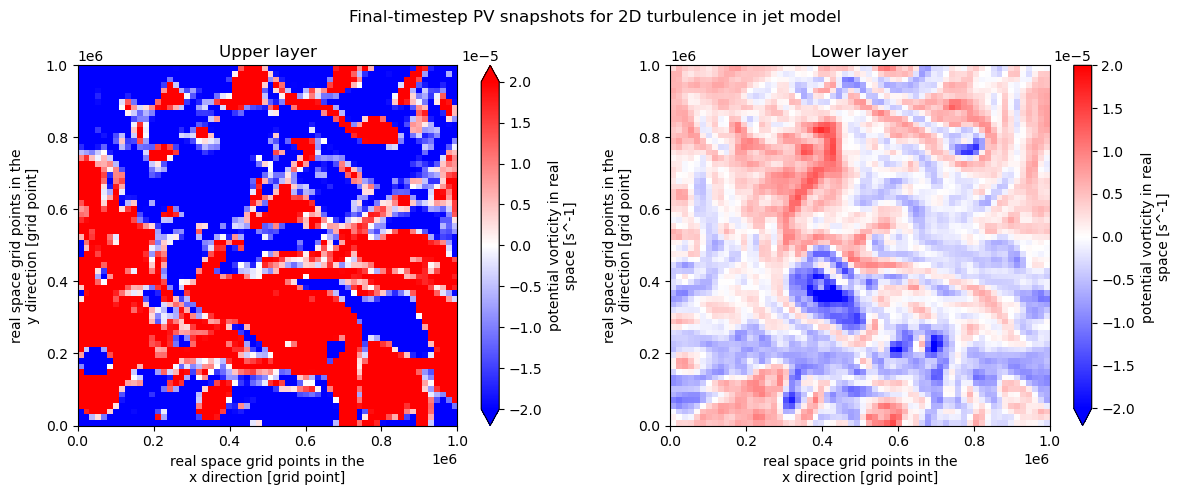

In [9]:
plt.figure(figsize=(12,5)).suptitle("Final-timestep PV snapshots for 2D turbulence in jet model")
plt.subplot(121); jet_model_highRes.q.isel(lev=0, time=-1).plot(vmin=-2e-5, vmax=2e-5, cmap='bwr'); plt.title("Upper layer")
plt.subplot(122); jet_model_highRes.q.isel(lev=1, time=-1).plot(vmin=-2e-5, vmax=2e-5, cmap='bwr'); plt.title( "Lower layer")
plt.tight_layout()